In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import seaborn as sns




In [ ]:
# Read in data
df=pd.read_csv("/content/drive/MyDrive/Credit_Scoring/credit_risk_dataset.csv")
df.describe()



,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
df


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


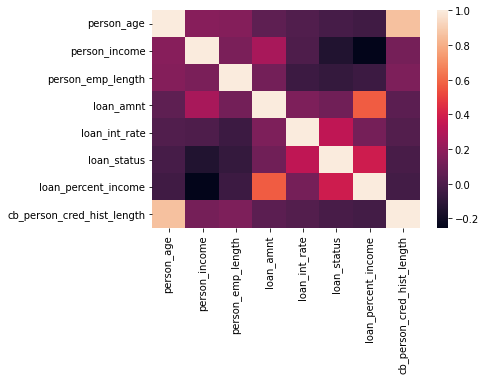

In [ ]:
# Compute the correlations
corr = df.corr()

# Create the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)


In [ ]:
df.shape

(32581, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

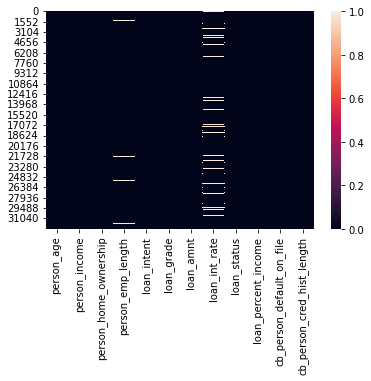

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df["person_emp_length"] = df["person_emp_length"].fillna(df["person_emp_length"].mean())
df["loan_int_rate"] = df["loan_int_rate"].fillna(df["loan_int_rate"].mean())


In [ ]:
# Convert occupation column to numeric values
df['person_home_ownership'] = df['person_home_ownership'].factorize()[0]

df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,0,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,1,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,2,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,0,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,0,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,2,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,2,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,0,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,2,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [ ]:
# Convert occupation column to numeric values
df['loan_intent'] = df['loan_intent'].factorize()[0]

df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,0,123.0,0,D,35000,16.02,1,0.59,Y,3
1,21,9600,1,5.0,1,B,1000,11.14,0,0.10,N,2
2,25,9600,2,1.0,2,C,5500,12.87,1,0.57,N,3
3,23,65500,0,4.0,2,C,35000,15.23,1,0.53,N,2
4,24,54400,0,8.0,2,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,2,1.0,0,C,5800,13.16,0,0.11,N,30
32577,54,120000,2,4.0,0,A,17625,7.49,0,0.15,N,19
32578,65,76000,0,3.0,4,B,35000,10.99,1,0.46,N,28
32579,56,150000,2,5.0,0,B,15000,11.48,0,0.10,N,26


In [ ]:
# Remove "years" prefix and convert column to numeric values
df['loan_grade'] = df['loan_grade'].factorize()[0]

df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,0,123.0,0,0,35000,16.02,1,0.59,Y,3
1,21,9600,1,5.0,1,1,1000,11.14,0,0.10,N,2
2,25,9600,2,1.0,2,2,5500,12.87,1,0.57,N,3
3,23,65500,0,4.0,2,2,35000,15.23,1,0.53,N,2
4,24,54400,0,8.0,2,2,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,2,1.0,0,2,5800,13.16,0,0.11,N,30
32577,54,120000,2,4.0,0,3,17625,7.49,0,0.15,N,19
32578,65,76000,0,3.0,4,1,35000,10.99,1,0.46,N,28
32579,56,150000,2,5.0,0,1,15000,11.48,0,0.10,N,26


In [ ]:
#  Generate Such Random Data
# Remove "years" prefix and convert column to numeric values
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].factorize()[0]

df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,0,123.0,0,0,35000,16.02,1,0.59,0,3
1,21,9600,1,5.0,1,1,1000,11.14,0,0.10,1,2
2,25,9600,2,1.0,2,2,5500,12.87,1,0.57,1,3
3,23,65500,0,4.0,2,2,35000,15.23,1,0.53,1,2
4,24,54400,0,8.0,2,2,35000,14.27,1,0.55,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,2,1.0,0,2,5800,13.16,0,0.11,1,30
32577,54,120000,2,4.0,0,3,17625,7.49,0,0.15,1,19
32578,65,76000,0,3.0,4,1,35000,10.99,1,0.46,1,28
32579,56,150000,2,5.0,0,1,15000,11.48,0,0.10,1,26


In [ ]:
# Separate the dataframe into independent and dependent variables
X = df.drop('loan_status', axis=1)
y = df['loan_status']



In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train

11601    0
2033     0
22884    1
6798     0
21277    0
        ..
21202    0
93       1
24384    1
16282    0
287      1
Name: loan_status, Length: 26064, dtype: int64

In [ ]:

# Create the model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [ ]:
# Make predictions on the test data
predictions = model.predict(X_test)
predictions



array([ 0.2861859 ,  0.14883837,  0.35618012, ...,  0.25820679,
       -0.01659308,  0.89863821])

In [ ]:
# Calculate the error between the predicted and actual values
error = mean_absolute_error(y_test, predictions)

print(f'Mean Absolute Error: {error:.2f}')

Mean Absolute Error: 0.27


In [ ]:
# Create a dataframe for the new individual's data
new_individual = pd.DataFrame(
    {
        "person_age" :[0],
        "person_income":[0],
        "person_home_ownership":[1],
        "person_emp_length":[12],
        "loan_intent":[1],
        "loan_grade":[2],
        "loan_amnt":[1200],
        "loan_int_rate":[12],
        "loan_percent_income":[12],
        "cb_person_default_on_file":[1],
        "cb_person_cred_hist_length":[2]
    }
)

In [ ]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

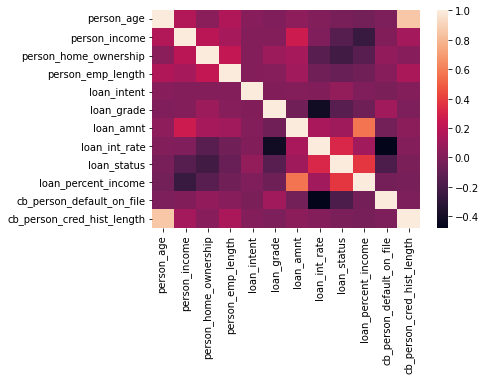

In [ ]:
# Compute the correlations
corr = df.corr()

# Create the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [ ]:
# Use the model to make a prediction for the new individual
prediction = model.predict(new_individual)

print(f'Predicted Credit Score: {prediction[0]:.2f}')


Predicted Credit Score: 21.27


Use Of **KNN** TO Test Efficiency

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error



In [ ]:
# Choose a value for K
K = 5

In [ ]:
# Create the model
knn = KNeighborsRegressor(n_neighbors=K)

In [ ]:
# Train the model on the training data
knn.fit(X_train, y_train)


KNeighborsRegressor()

In [ ]:
# Make predictions on the test set
y_pred = knn.predict(X_test)
y_pred


array([0.4, 0. , 0.4, ..., 0. , 0.2, 1. ])

In [ ]:
# check the shape of the data and columns
print(y_test.shape)
print(y_pred.shape)




(6517,)
(6517,)


In [ ]:
# Calculate the accuracy using R^2 score
r2_score = knn.score(X_test, y_test)

# Calculate the loss using mean squared error
mse = mean_squared_error(y_test, y_pred)

# calculate the MAE
mae = mean_absolute_error(y_test, y_pred)

print("R^2 score:", r2_score)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

R^2 score: 0.25462330110320686
Mean Squared Error: 0.1282430566211447
Mean Absolute Error: 0.21089458339726866


In [ ]:
# Create a dataframe for the new individual's data
new_individual = pd.DataFrame(
    {
        "person_age" :[28],
        "person_income":[20000],
        "person_home_ownership":[1],
        "person_emp_length":[12],
        "loan_intent":[1],
        "loan_grade":[2],
        "loan_amnt":[120000],
        "loan_int_rate":[12],
        "loan_percent_income":[10],
        "cb_person_default_on_file":[1],
        "cb_person_cred_hist_length":[8]
    }
)

In [ ]:
# Save the model in Pkl
with open('KNN_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
#  read MOdel from pkl
import pickle

# Load the model from the .pkl file
with open('KNN_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Use the model to make predictions
predictions = model.predict(new_individual)
predictions


1/1 [==============================] - 0s 56ms/step


array([[1410.3816]], dtype=float32)

In [ ]:
y_pred = knn.predict(new_individual)
y_pred

array([0.8])

Use **Neural** **Network**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
def preprocess_data(data):
  # Convert the data into a NumPy array
  data = np.array(data)
  
  # Shuffle the data
  np.random.shuffle(data)
  
  # Split the data into features (X) and labels (y)
  X = data[:, :-1]
  y = data[:, -1]
  
  # Split the data into training, validation, and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)


  
  return X_train, X_val, X_test, y_train, y_val, y_test



In [ ]:

from keras.models import Sequential
from keras.layers import Dense




In [ ]:
# Preprocess the data and split it into training, validation, and test sets
X_train, X_val, X_test, y_train, y_val, y_test = preprocess_data(df)
df



,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,0,123.0,0,0,35000,16.02,1,0.59,0,3
1,21,9600,1,5.0,1,1,1000,11.14,0,0.10,1,2
2,25,9600,2,1.0,2,2,5500,12.87,1,0.57,1,3
3,23,65500,0,4.0,2,2,35000,15.23,1,0.53,1,2
4,24,54400,0,8.0,2,2,35000,14.27,1,0.55,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,2,1.0,0,2,5800,13.16,0,0.11,1,30
32577,54,120000,2,4.0,0,3,17625,7.49,0,0.15,1,19
32578,65,76000,0,3.0,4,1,35000,10.99,1,0.46,1,28
32579,56,150000,2,5.0,0,1,15000,11.48,0,0.10,1,26


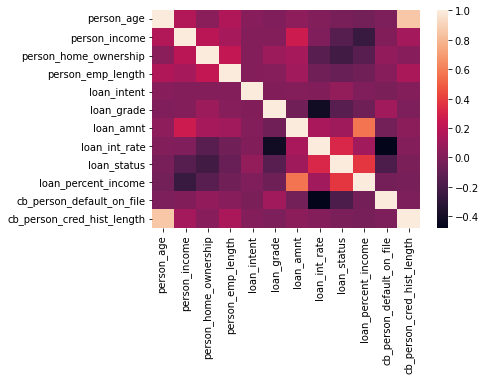

In [ ]:
# Compute the correlations
corr = df.corr()

# Create the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [ ]:
# Define the model architecture
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='linear'))



In [ ]:
# Compile the model using an appropriate loss function and optimization algorithm
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])



In [ ]:
# Train the model on the training set
model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_val, y_val))



Epoch 1/200
652/652 [==============================] - 3s 5ms/step - loss: 16.3755 - mean_absolute_error: 3.1600 - val_loss: 16.8461 - val_mean_absolute_error: 3.1866
Epoch 2/200
652/652 [==============================] - 2s 3ms/step - loss: 16.3760 - mean_absolute_error: 3.1636 - val_loss: 16.8460 - val_mean_absolute_error: 3.1862
Epoch 3/200
652/652 [==============================] - 2s 3ms/step - loss: 16.3757 - mean_absolute_error: 3.1642 - val_loss: 16.8456 - val_mean_absolute_error: 3.1846
Epoch 4/200
652/652 [==============================] - 2s 2ms/step - loss: 16.3759 - mean_absolute_error: 3.1637 - val_loss: 16.8455 - val_mean_absolute_error: 3.1840
Epoch 5/200
652/652 [==============================] - 2s 3ms/step - loss: 16.3758 - mean_absolute_error: 3.1622 - val_loss: 16.8455 - val_mean_absolute_error: 3.1837
Epoch 6/200
652/652 [==============================] - 2s 2ms/step - loss: 16.3758 - mean_absolute_error: 3.1617 - val_loss: 16.8457 - val_mean_absolute_error: 3.185

In [ ]:
# Evaluate the model on the test set
score = model.evaluate(X_test, y_test, batch_size=32)
print("Test loss: ", score[0])
print("Test MAE: ", score[1])

204/204 [==============================] - 2s 10ms/step - loss: 16.3359 - mean_absolute_error: 3.1616
Test loss:  16.33587074279785
Test MAE:  3.1615912914276123


In [ ]:
# Save the model in HDF5 format
model.save('Neural_model.h5')

In [ ]:
# Define the feature values for the new individual



In [ ]:
# Convert the feature values into a NumPy array
new_individual = np.array(new_individual)


In [ ]:

# Reshape the array into a 2D array with one sample
new_individual = new_individual.reshape(1, -1)
new_individual


array([[   0,    0,    1,   12,    1,    2, 1200,   12,   12,    1,    2]])

In [ ]:

# Make a prediction for the new individual
prediction = model.predict(new_individual)

# Print the prediction
print("Predicted credit score: ", prediction[0])


1/1 [==============================] - 0s 101ms/step
Predicted credit score:  [29.058737]
